#Advanced Example
-----------------------------
---------------------------
#Idea By [Jesse Steinweg-Woods](https://jessesw.com/Data-Science-Skills/)
----------------------------------------------------

#Reference CS109
--------------------------

Scraping Data Science Skills
=======================
- What Skills are in demand for data scientist

Scraping pages of indeed.com

**All the imports are case sensitive in python**

In [8]:
import urllib
import time
import socket
from IPython.display import HTML
import bs4
import _pickle as pickle
import numpy as np
import operator
import re

import pandas as pd
from pandas import DataFrame
from pandas import Series

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [47]:
url = "https://www.indeed.co.in/jobs?q=Data+Science&l="

source = urllib.request.urlopen(url).read()
# source

bs_tree = bs4.BeautifulSoup(source)
# print(bs_tree.prettify())

job_postings = bs_tree.find(id = "searchCount").contents[0]
# job_postings

In [48]:
print("The search yeilded %s hits" % (job_postings).split()[3])
# job_postings
job_postings = int(job_postings.split()[3].translate({ord(','): None}))
job_postings

The search yeilded 15,554 hits


15554

In [52]:
num_pages = int(np.ceil(job_postings/10.0))
jobLinks = []

for i in range(num_pages):
    if i%10 == 0:
        print(num_pages - i)
    url = "https://www.indeed.co.in/jobs?q=data+scientist&l=" + str(i*10)
    htmlPage = urllib.request.urlopen(url).read()
    bs_tree = bs4.BeautifulSoup(htmlPage)
    jobLinksArea = bs_tree.find(id='resultsCol')
    jobPostings = jobLinksArea.findAll('div')
    jobPostings = [div for div in jobPostings if not div.get('Class') is None and ''.join(div.get('class')) == 'rowresult']
    jobIDs = [jp.get('data-jk') for jp in jobPostings]
    
    #Form links to scrape skills from the job postings
    for id in jobIDs:
        jobLinks.append(url + "/rc/clk?jk=" + id)
    time.sleep(1)
        
print("%s jobs are there" % (len(jobLinks)))

1556
1546
1536
1526
1516
1506
1496
1486
1476
1466
1456


KeyboardInterrupt: 

In [56]:
# Save the scraped links
with open('scraped_links.pkl', 'wb') as f:
   pickle.dump(jobLinks, f)
    
# Read canned scraped links
with open('scraped_links.pkl', 'rb') as f:
    jobLinks = pickle.load(f)

In [66]:
skill_set = {'Python': 0, 'R': 0}

## write initialization into a file, so we can restart later
with open('scraped_links_restart.pkl', 'wb') as f:
   pickle.dump((skill_set, 0),f)   

In [67]:
# This code below does the trick, but could be optimized for speed if necessary
# e.g. skills are typically listed at the end of the webpage
# might not need to split/join the whole webpage, as we already know
# which words we are looking for 
# and could stop after the first occurance of each word
#the STRING opcode argument must be quoted {Error} 
original = "scraped_links_restart.pkl"
destination = "word_data_unix.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

print("Done. Saved %s bytes." % (len(content)-outsize))


with open('word_data_unix.pkl', 'rb') as f:
    skill_set, index = pickle.load(f)
    print(skill_set,index)
    print ("How many websites still to go? ", len(jobLinks) - index)

Done. Saved -1 bytes.
{'Python': 0, 'R': 0} 0
How many websites still to go?  0


In [68]:
counter = 0

for link in jobLinks[index:]:
    counter +=1  
    
    try:
        html_page = urllib.request.urlopen(link).read()
    except urllib.error.HTTPError:
        print ("HTTPError:")
        continue
    except urllib.error.URLError:
        print ("URLError:")
        continue
    except socket.error as error:
        print ("Connection closed")
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 5 == 0:
        print (len(jobLinks) - counter - index)
        print (skill_set)
        with open('scraped_links_restart.pkl','wb') as f:
            pickle.dump((skill_set, index+counter),f)

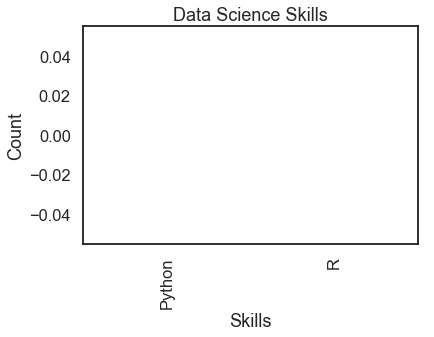

In [69]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()